In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [22]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [23]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [24]:
# Set features. This will also be used as your x values.
# Selected the columns which have importances > 0.02 
selected_features = df[[
    'koi_fpflag_nt',
    'koi_fpflag_ss',
    'koi_fpflag_co',
    'koi_fpflag_ec',
    'koi_period',
    'koi_impact',
    'koi_duration',
    'koi_prad',
    'koi_model_snr',
    'ra',
    'koi_kepmag'
]]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_prad,koi_model_snr,ra,koi_kepmag
0,0,0,0,0,54.418383,0.586,4.50700,2.83,25.8,291.93423,15.347
1,0,1,0,0,19.899140,0.969,1.78220,14.60,76.3,297.00482,15.436
2,0,1,0,0,1.736952,1.276,2.40641,33.46,505.6,285.53461,15.597
3,0,0,0,0,2.525592,0.701,1.65450,2.75,40.9,288.75488,15.509
4,0,0,0,0,4.134435,0.762,3.14020,2.77,40.2,296.28613,15.714


In [25]:
X = selected_features
y = df["koi_disposition"]

# Create a Train Test Split
Use koi_disposition for the y values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify =y)

In [27]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_impact,koi_duration,koi_prad,koi_model_snr,ra,koi_kepmag
6080,1,0,0,0,12.496435,1.1700,84.32000,55.34,141.5,289.23080,13.054
3001,0,0,0,0,11.615625,0.9770,2.23300,2.84,8.8,293.52756,15.162
570,0,1,0,0,10.980246,0.7330,3.74464,21.94,1555.4,282.79764,14.212
4897,1,0,0,0,466.908240,0.0868,2.64000,2.19,5.4,297.65436,15.202
625,0,1,1,1,1.061933,0.7130,2.14290,2.29,80.2,288.90253,12.953


In [28]:
from collections import Counter
Counter(y_train)

Counter({'FALSE POSITIVE': 2628, 'CANDIDATE': 1265, 'CONFIRMED': 1350})

It looks fairly balanced

# Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection


In [29]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X_train_scaled = MinMaxScaler().fit(X_train)
X_test_scaled = X_train_scaled.transform(X_test)
X_train_scaled = X_train_scaled.transform(X_train)

# Train the Decision Tree Model

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [35]:
clf_acc=clf.score(X_test_scaled, y_test)

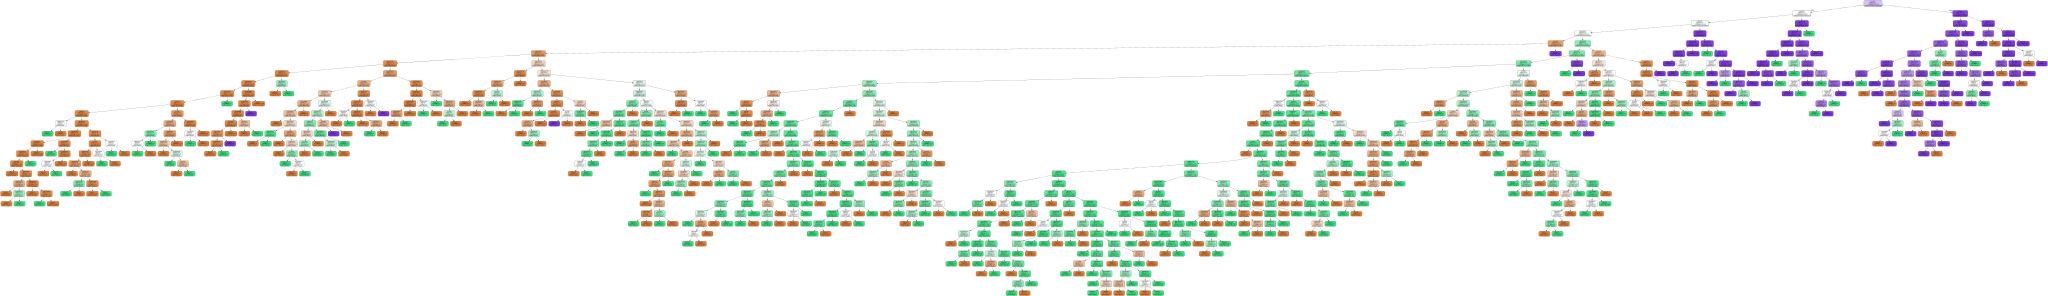

In [36]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None,   
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('exoplanet_decision_tree.png')

graph = graphviz.Source(dot_data)  
graph 

In [39]:
print(f"Accuracy = {clf_acc}")
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Accuracy = 0.8569794050343249
Training Data Score: 1.0
Testing Data Score: 0.8569794050343249


# Decision Tree Classification Report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.99      0.49      0.65       858
     CONFIRMED       0.01      0.02      0.02       266
FALSE POSITIVE       0.70      0.99      0.82       624

      accuracy                           0.60      1748
     macro avg       0.57      0.50      0.50      1748
  weighted avg       0.74      0.60      0.62      1748



In [42]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'zen_decision_tree_model.sav'
joblib.dump(clf, filename)

['zen_decision_tree_model.sav']